<a href="https://colab.research.google.com/github/yeneua/machine-learning/blob/main/04_1_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비

In [ ]:
import pandas as pd

In [ ]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [ ]:
fish.shape

(159, 6)

In [ ]:
fish_input = fish[['Weight','Length', 'Diagonal','Height', 'Width']].to_numpy() #특성데이터
fish_target = fish['Species'].to_numpy() #target 데이터

In [ ]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
fish_input.shape

(159, 5)

In [ ]:
fish_target[:20]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
fish_target.shape

(159,)

In [ ]:
print(pd.unique(fish['Species'])) # Species 열 확인(중복제거)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# 훈련세트 테스트세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [ ]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

K 최근접 이웃 분류

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_) # 모델에 저장된 타깃값 -> 문자열 : 알파벳순서대로 정렬됨

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5])) # 테스트 세트 처음 5개 샘플 예측

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) #predict_proba() : 클래스별 확률값
print(np.round(proba, decimals = 4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


로지스틱 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

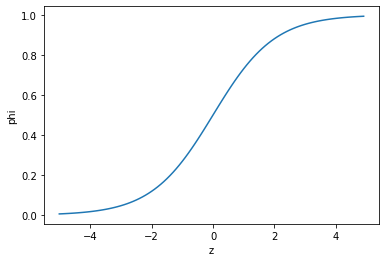

In [ ]:
z = np.arange(-5, 5, 0.1)
phi = 1/(1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

로지스틱 회귀 - 이진분류

In [ ]:
# boolean indexing
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [73]:
# 도미와 빙어 데이터만 뽑기 - 이진분류
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [74]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [78]:
print(lr.predict(train_bream_smelt[:5])) # 처음 데이터 5개 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [79]:
print(lr.predict_proba(train_bream_smelt[:5])) # predict_proba() : 예측확률

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [81]:
print(lr.classes_) # 알파벳순

['Bream' 'Smelt']


In [82]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [83]:
decision = lr.decision_function(train_bream_smelt[:5]) # decision_function() : z값 출력 메소그
print(decision)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [84]:
from scipy.special import expit #expit():시그모이드 함수
print(expit(decision))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [91]:
#테스트세트점수, 훈련세트점수??
test_bream_smelt_indexes = (test_target == 'Bream')|(test_target == 'Smelt')
test_bream_smelt = test_scaled[test_bream_smelt_indexes]
test_target_bream_smelt  = test_target[test_bream_smelt_indexes]
train_score =lr.score(train_bream_smelt,target_bream_smelt)
test_score = lr.score(test_bream_smelt,test_target_bream_smelt)
print(train_score,test_score)

1.0 1.0


로지스틱 회귀 - 다중 분류

In [93]:
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [94]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [96]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [98]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [99]:
# 가중치
# 열 : 특성
# 행 : 클래스
print(lr.coef_)

[[-1.49002087 -1.02912886  2.59345551  7.70357682 -1.2007011 ]
 [ 0.19618235 -2.01068181 -3.77976834  6.50491489 -1.99482722]
 [ 3.56279745  6.34357182 -8.48971143 -5.75757348  3.79307308]
 [-0.10458098  3.60319431  3.93067812 -3.61736674 -1.75069691]
 [-1.40061442 -6.07503434  5.25969314 -0.87220069  1.86043659]
 [-1.38526214  1.49214574  1.39226167 -5.67734118 -4.40097523]
 [ 0.62149861 -2.32406685 -0.90660867  1.71599038  3.6936908 ]]


In [100]:
print(lr.intercept_)

[-0.09205179 -0.26290885  3.25101327 -0.14742956  2.65498283 -6.78782948
  1.38422358]


In [102]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [103]:
# 5개 샘플에 대한 z값
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [105]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
